In [4]:
import os
import gc
import warnings
import numpy as np
from utils import *
import pandas as pd
from copy import deepcopy
warnings.filterwarnings('ignore')

class config:
    train_path = '../../../datasets/garanti-bbva-data-camp/train_users.csv'
    test_path = '../../../datasets/garanti-bbva-data-camp/test_users.csv'
    sub_path = '../../../datasets/garanti-bbva-data-camp/submission.csv'
    skills_path = '../../../datasets/garanti-bbva-data-camp/clean_skills.csv'
    languages_path = '../../../datasets/garanti-bbva-data-camp/clean_language.csv'
    education_path = '../../../datasets/garanti-bbva-data-camp/clean_education.csv'
    exp_path = '../../../datasets/garanti-bbva-data-camp/work_experiences.csv'


def fix_location(dataframe: pd.DataFrame, feature: str = "location") -> pd.DataFrame:

    tr_cities = load_tr_cities()
    df_ = dataframe.copy()
    df_.loc[
        df_[feature].astype(str).str.contains("Kahraman Maras"), feature
    ] = "Kahramanmaras, Turkey"
    df_.loc[
        df_[feature].astype(str).str.contains("Şanliurfa"), feature
    ] = "Sanliurfa, Turkey"
    df_.loc[df_[feature].astype(str).str.contains("İçel"), feature] = "Mersin, Turkey"
    df_.loc[
        df_[feature].astype(str).str.contains("Afyon"), feature
    ] = "Afyonkarahisar, Turkey"
    df_[feature] = df_[feature].apply(lambda x: str(x).replace("Türkiye", "Turkey"))
    df_[feature] = df_[feature].apply(lambda x: x.upper().strip())
    df_[feature] = df_[feature].apply(lambda x: translation(str(x)))
    for city in tr_cities:
        df_[feature] = df_[feature].apply(lambda x: city if city in x else x)
    df_[f"{feature}_based_on_tr"] = df_[feature].apply(
        lambda x: 1 if x in tr_cities or x == "TURKEY" else 0
    )

    return df_

In [5]:
train_df = pd.read_csv(config.train_path)
test_df = pd.read_csv(config.test_path)
sub = pd.read_csv(config.sub_path)

print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')
df = train_df.append(test_df).reset_index(drop = True)

df.head()

train_df shape: (53019, 4)
test_df shape: (13255, 3)


,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1.0
1,6950,Internet,"Istanbul, Istanbul, Turkey",0.0
2,4880,Online Media,Turkey,0.0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0.0
4,11005,Banking,"Istanbul, Turkey",0.0


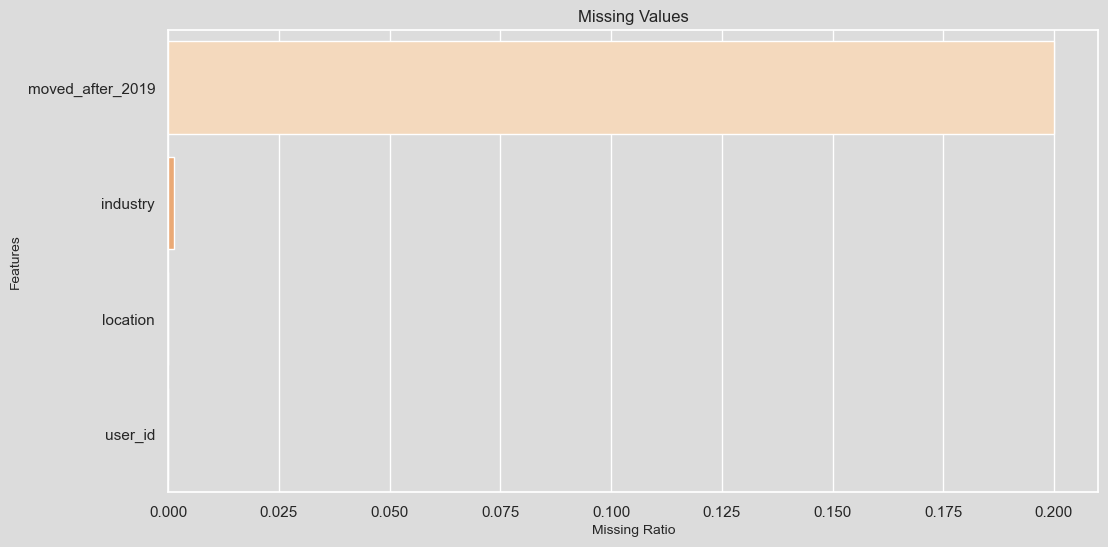

In [6]:
plot_missing(df)

In [7]:
def cat_analyser(data, col, freq_limit = 100):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= 'Greens',
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap('Greens')
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()

def plot_pie(dataframe, col, freq_limit = 100, fontsize: int = 10, save: bool = False):

    df_ = dataframe.copy()
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
                        
    values = df_[col].value_counts().values
    labels = df_[col].value_counts().keys()

    plt.figure(figsize = (8,8))
    plt.pie(values, labels = labels, autopct='%1.1f%%', textprops = {'fontsize': 10})
    #plt.tight_layout()
    if save:
        plt.savefig(f'plots/{col}_pie_chart.jpg')
    plt.show() 

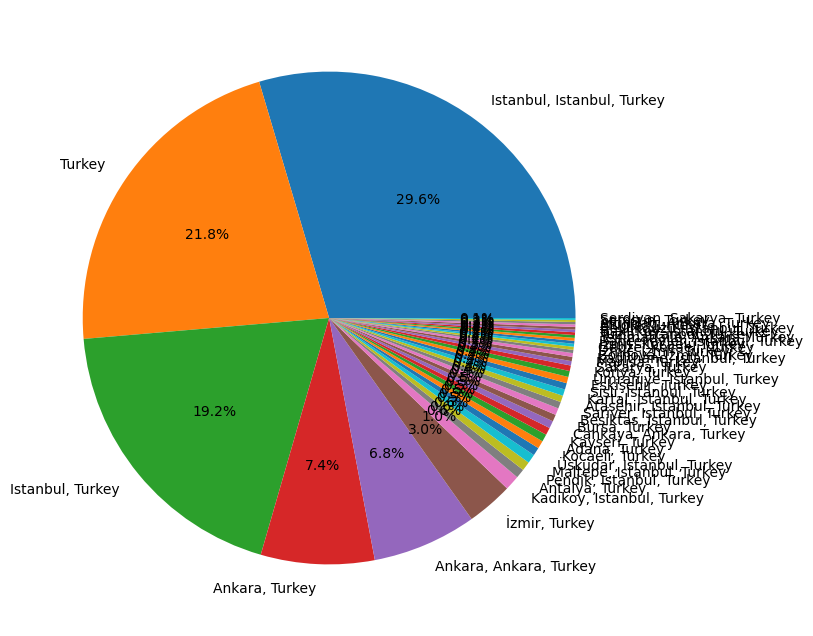

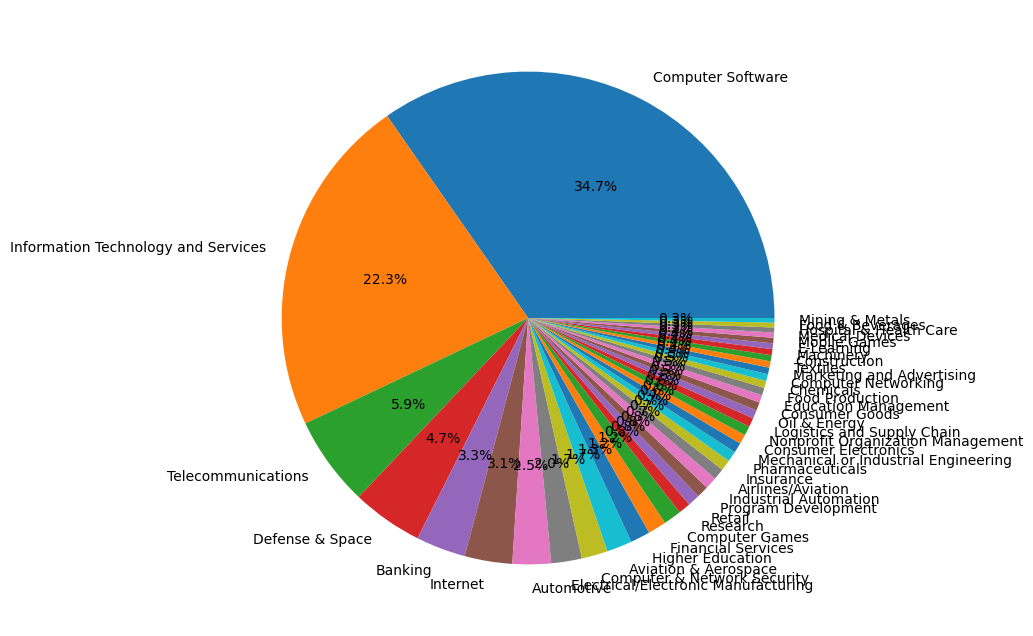

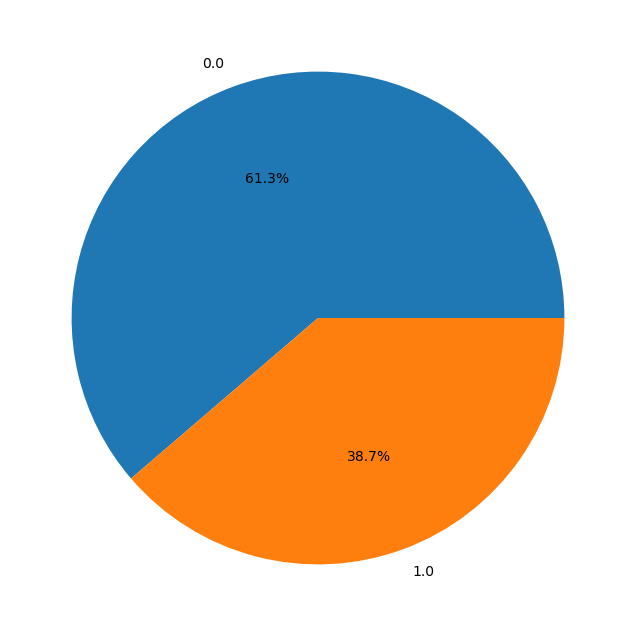

In [8]:
for col in ['location', 'industry', 'moved_after_2019']:
    
    plot_pie(df, col, 40)